In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, MaxPooling2D , Flatten , Dropout , BatchNormalization
#from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [ ]:
# Directory to dataset (Must change between Windows and Linux usage)
dataset_path = 'C:/Users/landy/Documents/VSCODE/fibers'
class_folders = os.listdir(dataset_path)
print(class_folders)

['AW', 'AW_FLEX', 'EZ', 'TWULL']


In [ ]:
# Function to read the text file and convert it to a 2D numpy array of integers
def textfile_to_numpy_array(filename):
    matrix = []
    with open(filename, 'r') as file:
        for line in file.readlines()[2:]:
            try:
                # Convert line to a list of integers
                row = [int(num) for num in line.split(',')]
                matrix.append(row)

            except ValueError:
                # If any line cannot be converted to integers, skip the file
                continue

    # Convert to a numpy array
    matrix = np.array(matrix).flatten()
    print(matrix)
    return matrix

# Example usage:
filename = 'C:/Users/landy/Documents/VSCODE/fibers/AW/067SF8710I2CLJ_R_OSE_Y_F40_220_420.txt'
array = textfile_to_numpy_array(filename)
array = array.flatten()
print(array)
print(array.shape)


[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
(3171,)


In [ ]:
dataset_path = 'C:/Users/landy/Documents/VSCODE/fibers'
class_folders = os.listdir(dataset_path)

# Directory format:
# Workspace {
#   class_folders {
#       txt_files
#   }
# }

# Empty array to store data
data = []

# Iterate through class_folders
# Create the path to class_folders by concat the class_label name to the dataset path
for class_label in class_folders:
    class_folder_path = os.path.join(dataset_path, class_label)

    # Iterate through the txt_files in each class_folder
    # Create the path to each txt_file by joining the txt_file name to previously created class_folder path
    for txt_file in os.listdir(class_folder_path):
        txt_file_path = os.path.join(class_folder_path, txt_file)

        # Applying function
        img_array = textfile_to_numpy_array(txt_file_path)

        # Create a row with the label and the flattened image array
        row = [class_label] + img_array.tolist()

        # Append the row to the data list
        data.append(row)

# Convert the data to DataFrame
df = pd.DataFrame(data)

# Write the DataFrame to CSV file
df.to_csv('fiber_dataset.csv', index=False, header=False)

[5 6 5 ... 0 0 0]
[1 0 1 ... 0 0 0]
[1 1 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[5 5 6 ... 0 0 0]
[1 0 2 ... 0 0 0]
[2 1 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[4 4 5 ... 0 0 0]
[1 1 1 ... 0 0 0]
[2 1 1 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[5 3 5 ... 0 0 0]
[0 1 1 ... 0 0 0]
[1 0 1 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[5 5 4 ... 0 0 0]
[2 1 0 ... 0 0 0]
[0 1 1 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ...

In [ ]:
print(df[0].unique())

['AW' 'AW_FLEX' 'EZ' 'TWULL']


In [ ]:
# Plotting random fiber image
import random
import warnings

warnings.filterwarnings('ignore')

# Generating a random integer
idx = random.randint(0, df.shape[0])
# Printing label of fiber in the random int indexed row
print(df.loc[idx][0])

# Setting the image data of fiber in random int indexed row into an array
# Reshaping to image dimensions (151 x 21)
img_arr = df.loc[idx][1:]
img_arr = img_arr.to_numpy()
img_arr = img_arr.astype('float64')
img_arr = img_arr.reshape(151, 21)

# Plotting the image using array of pixel values
plt.imshow(img_arr, interpolation='nearest')
plt.show()


0
AW         5256
TWULL      5184
AW_FLEX    3912
EZ          852
Name: count, dtype: int64


Text(0.5, 1.0, 'Number of Fibers Per Class')

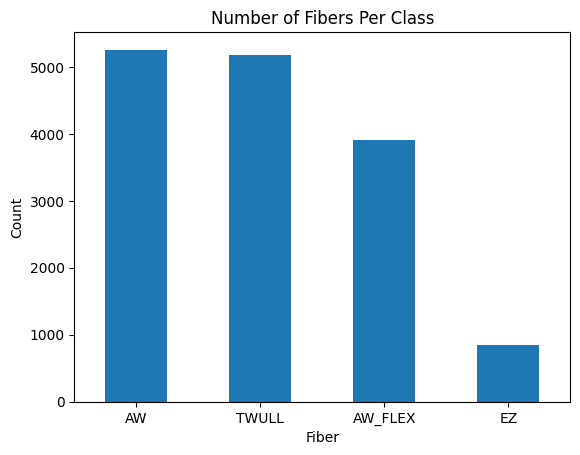

In [ ]:
# Fiber type count EDA
df[0].value_counts().plot.bar(rot = 0)
print(df[0].value_counts())
plt.xlabel('Fiber')
plt.ylabel('Count')
plt.title('Number of Fibers Per Class')

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Defining the image data (input) and the label data
df = pd.read_csv('C:/Users/landy/Documents/VSCODE/ML/fiber_dataset.csv', header=None)
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

y = label_encoder.fit_transform(y)

#Train Test split of 7:3
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3)
Y_train

array([0, 1, 0, ..., 0, 1, 3])

In [ ]:
# Changing data format to array and setting data type to float32
X_train = np.array(X_train, dtype = 'float32')
X_test = np.array(X_test, dtype = 'float32')
Y_train = np.array(Y_train, dtype ='float32')
Y_test = np.array(Y_test, dtype='float32')

In [ ]:
X_train

array([[1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Normalizing pixels (ONLY RUN ONCE)
# Pixel values are changed to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train,test_size = 0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#class_weight = {0: 0.3, 1: 0.4, 2: 1.0, 3: 0.3}
modelTree = DecisionTreeClassifier(criterion = 'gini', splitter = 'best')

modelTree.fit(X_train, Y_train)

y_pred = modelTree.predict(X_test)

In [ ]:
print("Accuracy score: ", accuracy_score(Y_test,y_pred))
print("Precision Score : ",precision_score(Y_test, y_pred,average='micro'))
print("Recall Score : ", recall_score(Y_test, y_pred, average='micro'))

Accuracy score:  0.9085927224901359
Precision Score :  0.9085927224901359
Recall Score :  0.9085927224901359


In [ ]:
unique, counts = np.unique(y_pred, return_counts = True)
print(unique, counts)

[0. 1. 2. 3.] [1534 1195  254 1579]


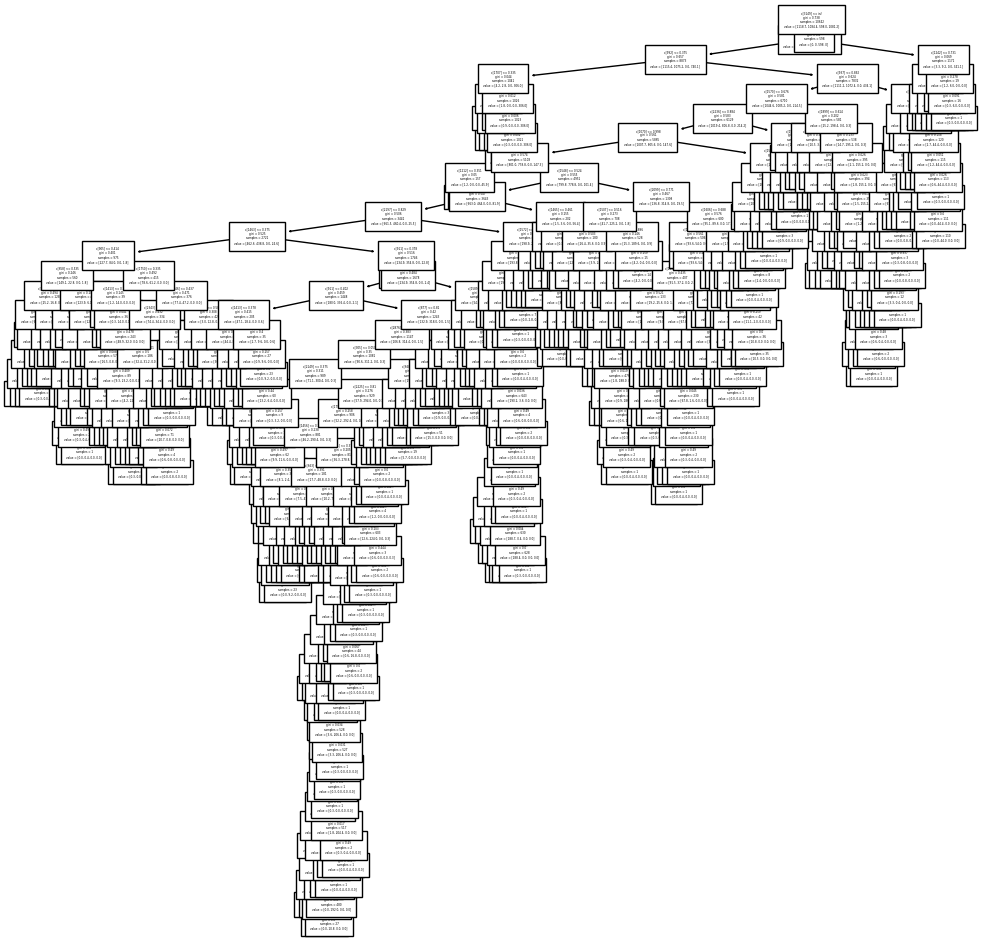

In [ ]:
from sklearn import tree
from sklearn.datasets import load_iris
# from IPython.display import Image, display
# import pydotplus

# dot_data = tree.export_graphviz(modelTree, out_file = None, filled = True, rounded = True)
# graph = pydotplus.graph_from_dot_data(dot_data)
# display(Image(data=graph.create_png()))

iris = load_iris()

plt.figure(figsize=(12, 12))
tree.plot_tree(modelTree, fontsize=2)
plt.show()

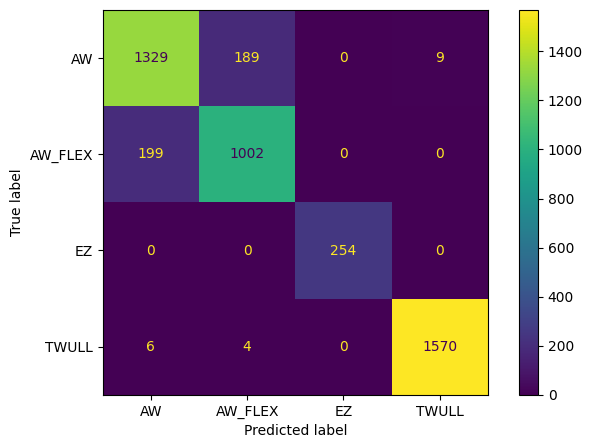

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

fig, ax = plt.subplots(figsize= (8,5))
conf = ConfusionMatrixDisplay(confusion_matrix(Y_test, y_pred),display_labels=['AW', 'AW_FLEX', 'EZ', 'TWULL'])

conf.plot(ax=ax)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
import time
parameters = {'criterion':['gini','entropy'],
              'max_depth':np.arange(1,21).tolist()[0::2],
              'min_samples_split':np.arange(2,11).tolist()[0::2],
              'max_leaf_nodes':np.arange(3,26).tolist()[0::2],
              'class_weight': class_weight}

# create an instance of the grid search object
g1 = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1)

# conduct grid search over the parameter space
start_time = time.time()
g1.fit(X_train,Y_train)
duration = time.time() - start_time

# show best parameter configuration found for classifier
params1 = g1.best_params_
params1

{'criterion': 'entropy',
 'max_depth': 13,
 'max_leaf_nodes': 25,
 'min_samples_split': 10}

In [ ]:
# Plotting Fiber Images and Comparing Predicted Class to Actual Class

tree_pred = y_pred

L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
fig.tight_layout()
axes = axes.ravel()

for i in np.arange(0, L * W):
    r = random.randint(0, len(y_pred))
    axes[i].imshow(X_test[r].reshape(151,21))
    axes[i].set_title(f"Prediction Class = {tree_pred[r]}\n Original Class = {Y_test[r]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.7)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomTree = RandomForestClassifier(criterion='gini', bootstrap=True)

randomTree.fit(X_train, Y_train)

rf_pred = randomTree.predict(X_test)

In [ ]:
print("Accuracy score: ", accuracy_score(Y_test,rf_pred))
print("Precision Score : ",precision_score(Y_test, rf_pred,average='micro'))
print("Recall Score : ", recall_score(Y_test, rf_pred, average='micro'))

Accuracy score:  0.9774221832529593
Precision Score :  0.9774221832529593
Recall Score :  0.9774221832529593


In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/landy/Documents/VSCODE/ML/Graphviz-12.0.0-win64/bin'

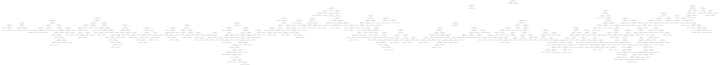

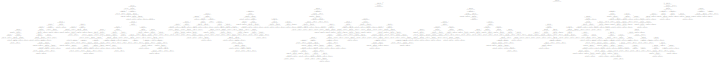

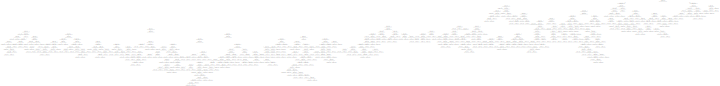

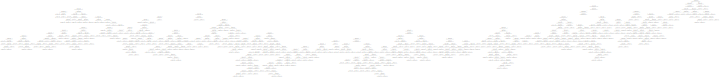

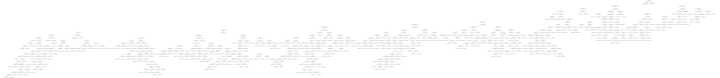

In [ ]:
import pydotplus
from sklearn.tree import export_graphviz
import graphviz

for i in range(5):
    tree = randomTree.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X.columns,
                               impurity=False,
                               proportion=True)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    pydot_graph.set_size('"10,10!"')
    gvz_graph = graphviz.Source(pydot_graph.to_string())
    display(gvz_graph)

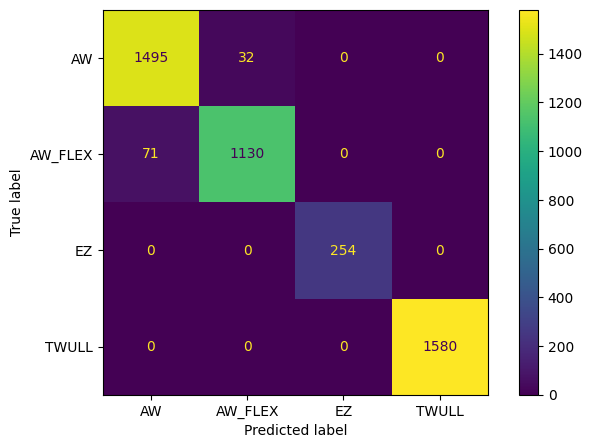

In [ ]:
fig, ax = plt.subplots(figsize= (8,5))
conf = ConfusionMatrixDisplay(confusion_matrix(Y_test, rf_pred),display_labels=['AW', 'AW_FLEX', 'EZ', 'TWULL'])

conf.plot(ax=ax)
plt.show()

In [ ]:
# Plotting Fiber Images and Comparing Predicted Class to Actual Class

rand_tree_pred = rf_pred

L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
fig.tight_layout()
axes = axes.ravel()

for i in np.arange(0, L * W):
    r = random.randint(0, len(rf_pred))
    axes[i].imshow(X_test[r].reshape(151,21))
    axes[i].set_title(f"Prediction Class = {rand_tree_pred[r]}\n Original Class = {Y_test[r]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.7)

In [ ]:
# Reshaping the data
# Image is 151 x 21 pixels
img_rows = 151
img_cols = 21

# Transforming the data to image shape dimensions
# The label data has dimension 1
img_shape = (img_rows, img_cols, 1)
X_train = X_train.reshape(X_train.shape[0],*img_shape)
X_test = X_test.reshape(X_test.shape[0], *img_shape)
Y_train = Y_train.reshape(Y_train.shape[0], 1)
Y_test = Y_test.reshape(Y_test.shape[0], 1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(img_shape)

(8513, 151, 21, 1)
(2129, 151, 21, 1)
(8513, 1)
(2129, 1)
(151, 21, 1)


In [ ]:
print(X_train)

In [ ]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
LOG_DIR = f"{int(time.time())}"
X_train1 = X_train.reshape(-1, 151, 21, 1)
X_test1 = X_test.reshape(-1, 151, 21, 1)

def build_model(hp):
    model = Sequential()
    model.add(Conv2D(hp.Int("input_units", min_value = 32, max_value = 256, step = 32), (3, 3), input_shape= X_train1.shape[1:]))

    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(Conv2D(hp.Int(f"conv_{i}_units", min_value = 32, max_value = 256, step = 32), (3, 3)))
        model.add(Activation("relu"))

    model.add(Flatten())

    model.add(Dense(4))

    # Softmax activation for classification with more than 2 classes
    model.add(Activation('softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

    return model

tuner = RandomSearch(
    build_model,
    objective = 'val_accuracy',
    max_trials = 5,
    executions_per_trial = 1,
    directory = LOG_DIR
    )

tuner.search(x = X_train1,
             y = Y_train,
             epochs = 20,
             batch_size = 30,
             validation_data = (X_test1, Y_test))
# model = build_model()
# model.fit(
#     X_train,
#     Y_train,
#     batch_size = 30,
#     epochs=20,
#     verbose = 1,
#     validation_data=(X_test,Y_test))

Trial 5 Complete [00h 25m 39s]
val_accuracy: 0.34476280212402344

Best val_accuracy So Far: 0.34476280212402344
Total elapsed time: 06h 01m 46s


In [ ]:
from tensorflow.keras.optimizers import Adam
from keras import regularizers
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=img_shape, kernel_regularizer=regularizers.L2(l2 = 0.1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding= 'same'))

model.add(Conv2D(64, (3, 3), kernel_regularizer= regularizers.l2(l2=0.1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))

model.add(Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(l2=0.1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate = 0.001),
              metrics=['accuracy'])

In [ ]:
model = Sequential()
num_classes = len(class_folders)
#convolution layer
#256 nodes
#3x3 convolutional window
#input_shape takes the 2,3,and 4th element of image vector
# [img shape,image shape, pixel intensity]
model.add(Conv2D(3171, (30, 4), strides = (1,1), input_shape= img_shape))
#add dropout that randomly drops 30% of nodes
#model.add(Dropout(.3, input_shape = (2196,)))

# ReLU activation
model.add(Activation('relu'))

    #pooling applied to layer
model.add(MaxPooling2D(pool_size=(5, 3), strides = (5,3)))

#another convolution layer
model.add(Conv2D(108, (3, 3), strides = (1,1)))
#add dropout that randomly drops 30% of nodes
#model.add(Dropout(.2, input_shape = (644,)))

#rectified linear applied to convolution
model.add(Activation('relu'))

#pooling applied to layer
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))

#this converts our 3D feature maps to 1D feature vectors

model.add(Flatten())
#model.add(Dropout(.25, input_shape = (24,)))
#dense layer added with 64 nodes

#add dropout that randomly drops 30% of nodes
#model.add(Dropout(.2))
#dense layer added with 3 output nodes
#one node for each class
model.add(Dense(num_classes))

# Softmax activation for classification with more than 2 classes
model.add(Activation('softmax'))

In [ ]:
model = Sequential()
num_classes = len(class_folders)

# First convolution layer
model.add(Conv2D(3171, (30, 4), strides=(1, 1), input_shape=img_shape))
model.add(Activation('relu'))

# First max pooling layer
model.add(MaxPooling2D(pool_size=(5, 3), strides=(5, 3)))

# Dropout layer to prevent overfitting
model.add(Dropout(0.3))

# Second convolution layer
model.add(Conv2D(108, (3, 3), strides=(1, 1)))
model.add(Activation('relu'))

# Second max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Additional layers
# Third convolution layer
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))

# Third max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout layer to prevent overfitting
model.add(Dropout(0.4))

# Flatten the 3D feature maps to 1D feature vectors
model.add(Flatten())

# Fully connected layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Summary of the model
model.summary()


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_61 (Conv2D)              │ (None, 122, 18, 3171)  │       383,691 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_99 (Activation)      │ (None, 122, 18, 3171)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_61 (MaxPooling2D) │ (None, 24, 6, 3171)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 24, 6, 3171)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 22, 4, 108)     │     3,082,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_100 (Activation)     │ (None, 22, 4, 108)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_62 (MaxPooling2D) │ (None, 11, 2, 108)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 11, 2, 256)     │       249,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_101 (Activation)     │ (None, 11, 2, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 5, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 5, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_102 (Activation)     │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 4)              │         2,052 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_103 (Activation)     │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,373,023 (16.68 MB)

 Trainable params: 4,373,023 (16.68 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(X_train.shape)

(5780, 151, 21, 1)


In [ ]:
# Model Compilation
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
# Use binary_crossentropy for 2 classes or multilabel. Use categorical_crossentropy for more than 2 classes.
# Optimizer Adam
model.compile(loss= 'sparse_categorical_crossentropy',
                  optimizer= 'adamax',
                  metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_61 (Conv2D)              │ (None, 122, 18, 3171)  │       383,691 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_99 (Activation)      │ (None, 122, 18, 3171)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_61 (MaxPooling2D) │ (None, 24, 6, 3171)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 24, 6, 3171)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 22, 4, 108)     │     3,082,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_100 (Activation)     │ (None, 22, 4, 108)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_62 (MaxPooling2D) │ (None, 11, 2, 108)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 11, 2, 256)     │       249,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_101 (Activation)     │ (None, 11, 2, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 5, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 5, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_102 (Activation)     │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 4)              │         2,052 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_103 (Activation)     │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,373,023 (16.68 MB)

 Trainable params: 4,373,023 (16.68 MB)

 Non-trainable params: 0 (0.00 B)

<span style="font-size:1.5em;">First Conv2D: Parameters = img shape * (length * width * depth + 1) = 3171 * (30 * 4 * 1 + 1) = 383691 Parameters \
Note that the input depth is 1<span>

<span style="font-size:1.5em;">ReLU Activation: 0 Parameters \
MaxPooling: 0 Parameters<span>

<span style="font-size:1.5em;">Second Conv2D: Parameters = img shape * (length * width * depth + 1) = 108 * (3 * 3 * 3171 + 1) = 3082320 Parameters \
The new depth is always the img shape of the preceeding Conv2D layer (3171 in this layer)<span>

<span style="font-size:1.5em;">ReLU Activation: 0 Parameters
MaxPooling: 0 Parameters<span>

<span style="font-size:1.5em;">Fully Connected Layer: Parameters = (Output shape + 1) * number output nodes = (11 * 2 * 108 + 1) * 3 = 7131 Parameters<span>

<span style="font-size:1.5em;">Output Layer: 0 Parameters<span>

In [ ]:
# Training the Model
#class_weight = {0: 1.0, 1: 0.3, 2: 1.0, 3: 0.2}
history = model.fit(
    X_train,
    Y_train,
    batch_size = 30,
    epochs=20,
    validation_data=(X_test,Y_test)
)

In [ ]:
from hyperopt import Trials, STATUS_OK, tpe
from hyperopt import hp, fmin

def create_model(hyperparams):
    model = Sequential()
    model.add(Conv2D(3171, (30, 4), strides=(1,1), activation='relu', input_shape=(151, 21, 1)))
    model.add(MaxPooling2D((5, 3), strides=(5,3)))
    model.add(Conv2D(108, (3, 3), strides=(1,1), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2,2)))
    model.add(Flatten())

    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer=hyperparams['optimizer'], loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def objective(hyperparams):
    model = create_model(hyperparams)
    model.fit(X_train, Y_train, epochs=hyperparams['epochs'], batch_size=hyperparams['batch_size'], verbose=0)
    _, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    return {'loss': -accuracy, 'status': STATUS_OK}

space = {
    'optimizer': hp.choice('optimizer', ['rmsprop', 'adam']),
    'batch_size': hp.choice('batch_size', [32, 64, 128]),
    'epochs': hp.choice('epochs', [10, 20, 30])
}

trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

print(best)


Text(0.5, 1.0, 'Train - Accuracy')

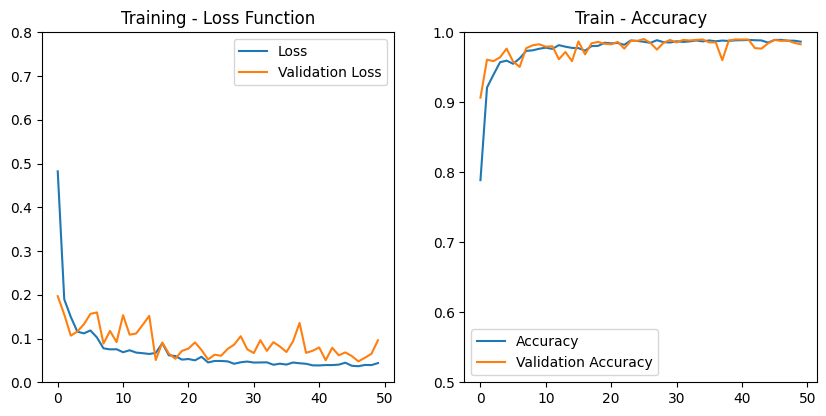

In [ ]:
# Plotting Loss and Accuracy over Epoch
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.ylim([0, 0.8])
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.ylim([0.5, 1.0])
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [ ]:
# Test Accuracy
score = model.evaluate(X_test,Y_test,verbose=0)
print('Test Accuracy : {:.2f}'.format(score[1]*100) + '%')

Test Accuracy : 98.28%


In [ ]:
# Plotting Fiber Images and Comparing Predicted Class to Actual Class
predicted_probabilities = model.predict(X_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)

L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
fig.tight_layout()
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(151,21))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]}\n Original Class = {Y_test[i]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.7)

Data Augmentation (Not Fully Implemented)

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

In [ ]:
## Displaying some randomly augmented training images

plt.figure(figsize=(10, 10))
idx1 = random.randint(0, len(X_train))
image = X_train[idx1][:]
for i in range(9):
    augmented_images = data_augmentation(image.reshape(151,21, 1))
    aug_pred = model.predict(augmented_images)
    aug_class = np.argmax(aug_pred, axis = 1)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images)
    plt.axis("off")

In [ ]:
plt.imshow(augmented_images)
pred_aug = model.predict(augmented_images)

In [ ]:
aug_pred = model.predict(augmented_images)
aug_class = np.argmax(aug_pred, axis = 1)



In [ ]:
dir = 'C:/Users/landy/Documents/VSCODE/ML/testing3'
img_arr1 = textfile_to_numpy_array(dir)
df1 = pd.DataFrame(img_arr1)

# Write the DataFrame to CSV file
df1.to_csv('awtest.csv', index=False, header=False)
df1 =  df1.loc[6335:9505][0]
img_arr1 = df1.to_numpy()
len(img_arr1)
pred_prob = predicted_probabilities(img_arr1)